In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

In [9]:
data = Table.read('pszcombined_rass_finalrun.out', format='ascii', header_start=1,)

In [10]:
data

Name,RA,Dec,Number,Rate/s,err/s,sigma,t(sec),src,bkgd
str18,float64,float64,float64,float64,float64,float64,float64,int64,int64
PSZ1_G001.00+25.71,244.5841,-13.0701,1.0,-0.0026,0.00387,-0.67,1147.58,0,0
PSZ1_G003.09-22.51,292.1644,-35.7111,2.0,-0.00568,0.00773,-0.73,299.2,0,0
PSZ1_G003.60-24.45,294.6129,-35.8392,3.0,0.00352,0.00953,0.37,293.71,0,0
PSZ1_G011.35-72.94,354.0719,-32.1349,4.0,0.00586,0.01569,0.37,127.19,0,0
PSZ1_G011.50-40.11,314.9335,-32.8485,5.0,-0.00415,0.00442,-0.94,453.99,0,0
PSZ1_G012.48+27.36,249.3729,-3.8186,6.0,-0.00508,0.00384,-1.32,604.54,0,0
PSZ1_G012.66+25.79,250.7751,-4.5418,7.0,0.00038,0.00632,0.06,476.51,0,0
PSZ1_G015.42+58.42,223.8901,14.3771,8.0,-0.00018,0.00842,-0.02,358.09,0,1
PSZ1_G017.05-22.67,297.2689,-23.6063,9.0,-0.00033,0.00856,-0.04,269.46,0,0


<IPython.core.display.Javascript object>


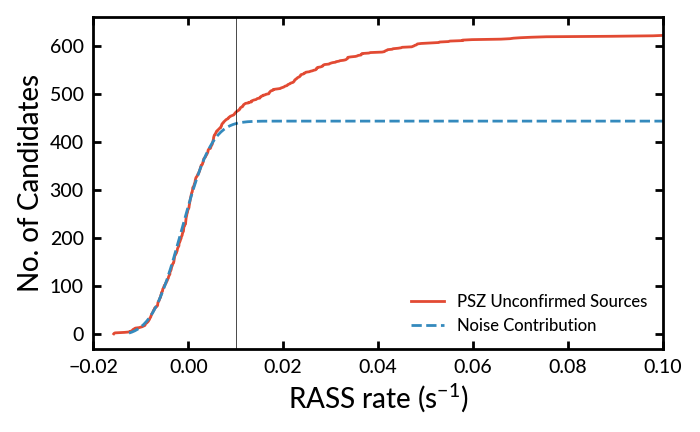

In [11]:
fig, ax = plt.subplots(figsize=(7, 7 * (np.sqrt(5.) - 1.0) / 2.0))

In [12]:
hbins = np.arange(-0.0125, 0.1025, 0.000625)
ny3mod = 0.28
xcen = -0.001 # rate/s
xsigma = 0.005 # rate/s

In [13]:
y2 = ny3mod / np.sqrt(2.* np.pi) / xsigma * np.exp( -0.5 * ((hbins - xcen) / xsigma )**2)
rnoise = np.cumsum(y2)

In [14]:
plt.plot(np.sort(data['Rate/s'])[1:], np.arange(len(data['Rate/s']) - 1), color='#E24A33', label='PSZ Unconfirmed Sources')
plt.plot(hbins, rnoise, ls='--', color='#348ABD', label='Noise Contribution')

In [15]:
# ax.fill_between(np.sort(data['Rate/s'])[1:], 423, np.arange(len(data['Rate/s']) - 1), fc='purple', alpha=0.3)

In [16]:
plt.xlabel('RASS rate $(s^{-1}$)')
plt.ylabel('No. of Candidates')
plt.xlim(-0.02, 0.1)
plt.axvline(0.01, lw=0.5)

In [17]:
plt.tight_layout()

In [18]:
plt.legend()

In [19]:
plt.savefig('rassrates', bbox='tight')